In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [90]:
# Archivo de prueba (Micaela)
prueba_eyetracker = pd.read_csv('Prueba_SujetoPaula_OjoDerecho_Eyetracker.csv',delimiter=';')
prueba_teclado = pd.read_csv('Prueba_SujetoMicaela_OjoDerecho_Teclado.csv',delimiter=';')

#prueba_eyetracker=pd.read_csv('Prueba_SujetoMicaela_OjoIzquierdo_Eyetracker.csv',delimiter=';')
#prueba_teclado = pd.read_csv('Prueba_SujetoMicaela_OjoIzquierdo_Teclado.csv',delimiter=';')


#prueba_eyetracker=pd.read_csv('Prueba_SujetoMariana_OjoIzquierdo_Eyetracker.csv',delimiter=';')
#prueba_teclado = pd.read_csv('Prueba_SujetoMariana_OjoIzquierdo_Teclado.csv',delimiter=';')

#prueba_eyetracker=pd.read_csv('Prueba_SujetoMariana_OjoDerecho_Eyetracker.csv',delimiter=';')
#prueba_teclado = pd.read_csv('Prueba_SujetoMariana_OjoDerecho_Teclado.csv',delimiter=';')


In [91]:
#Defino mapas de eyetracker (mapa 1) y Teclado(mapa 2)
mapa_eyetracker, mapa_teclado = [],[]
mapa_base = []


for i in range(len(prueba_eyetracker)):
    mapa_eyetracker.append([prueba_eyetracker['coordenada x [mm]'][i],
                            prueba_eyetracker['coordenada y [mm]'][i]])
    for j in range(prueba_eyetracker['frecuencia de fallos'][i]):
        mapa_eyetracker.append([prueba_eyetracker['coordenada x [mm]'][i],
                                prueba_eyetracker['coordenada y [mm]'][i]])
        
for i in range(len(prueba_teclado)):
    mapa_teclado.append([prueba_teclado['coordenada x [mm]'][i],
                         prueba_teclado['coordenada y [mm]'][i]])
    for j in range(prueba_teclado['frecuencia de fallos'][i]):
        mapa_teclado.append([prueba_teclado['coordenada x [mm]'][i],
                             prueba_teclado['coordenada y [mm]'][i]])
        

for i in range(len(prueba_eyetracker)):
    mapa_base.append([prueba_eyetracker['coordenada x [mm]'][i],
                      prueba_eyetracker['coordenada y [mm]'][i]])

Suma total de frecuencias: 1.0
Suma total de frecuencias: 1.0


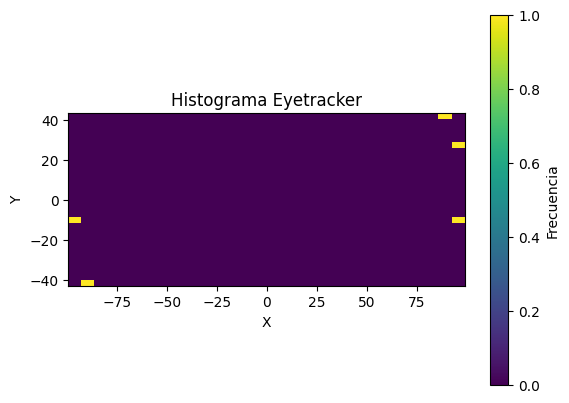

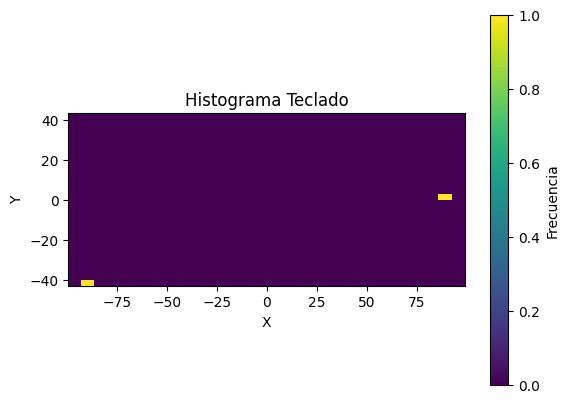

In [92]:
# Convertir la lista de listas en un array de NumPy
mapa_eyetracker,mapa_teclado = np.array(mapa_eyetracker),np.array(mapa_teclado)

mapa_base = np.array(mapa_base)

# Calcular histogramas 2D
hist1, xedges1, yedges1 = np.histogram2d(mapa_eyetracker[:,0],
                                         mapa_eyetracker[:,1],
                                         bins=[30, 30])

hist2, xedges2, yedges2 = np.histogram2d(mapa_teclado[:,0], 
                                         mapa_teclado[:,1], 
                                         bins=[30, 30])

hist0, xedges0, yedges0 = np.histogram2d(mapa_base[:,0],
                                          mapa_base[:,1],
                                          bins=[30, 30])

hist1 = np.abs(hist1 - hist0)
hist2 = np.abs(hist2 - hist0)

# Normalizar ambos histogramas
hist_eyetracker_normalizado = hist1 / np.sum(hist1)
hist_teclado_normalizado = hist2 / np.sum(hist2)


# Calcular la suma total de frecuencias
total_frecuencias1 = np.sum(hist_eyetracker_normalizado)
print("Suma total de frecuencias:", total_frecuencias1)
# Calcular la suma total de frecuencias
total_frecuencias2 = np.sum(hist_teclado_normalizado)
print("Suma total de frecuencias:", total_frecuencias2)


# Mostrar el histograma 2D
plt.imshow(hist1.T, origin='lower', 
           cmap='viridis', 
           extent=[xedges1[0],xedges1[-1], 
                   yedges1[0], yedges1[-1]])
plt.colorbar(label='Frecuencia')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histograma Eyetracker')
plt.show()

plt.imshow(hist2.T, origin='lower', 
           cmap='viridis', 
           extent=[xedges2[0], xedges2[-1], 
                   yedges2[0], yedges2[-1]])
plt.colorbar(label='Frecuencia')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histograma Teclado')
plt.show()

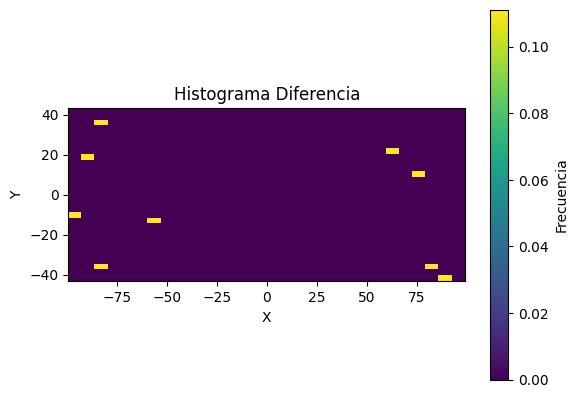

In [58]:
hist_diferencia = np.abs(hist1-hist2)
hist_diferencia_normalizado = hist_diferencia/np.sum(hist_diferencia)


plt.imshow(hist_diferencia_normalizado.T, origin='lower', 
           cmap='viridis', 
           extent=[xedges2[0], xedges2[-1], 
                   yedges2[0], yedges2[-1]])
plt.colorbar(label='Frecuencia')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histograma Diferencia')
plt.show()

## 1. Correlación de Histogramas:
#### Calcular la correlación entre los histogramas 2D. Esto te dará una medida de similitud entre las distribuciones.

In [81]:
# Suponiendo que hist1 y hist2 son los histogramas 2D de tus mapas de calor
correlation = np.corrcoef(hist_eyetracker_normalizado.flatten(), 
                          hist_teclado_normalizado.flatten())[0, 1]
print(f"Correlación entre histogramas: {correlation}")

Correlación entre histogramas: 0.6017365857911882


## 2. Distancia de Bhattacharyya:
#### Es una medida que compara dos distribuciones de probabilidad. Se puede utilizar para evaluar la similitud entre dos histogramas.

In [76]:
import cv2

# Calcula la distancia de Bhattacharyya
dist = cv2.compareHist(hist_eyetracker_normalizado.astype('float32'), 
                       hist_teclado_normalizado.astype('float32'), 
                       cv2.HISTCMP_BHATTACHARYYA)
print(f"Distancia de Bhattacharyya: {dist}")

Distancia de Bhattacharyya: 0.6302685271788019


## 3. Intersección de Histogramas
#### La intersección de histogramas mide la superposición entre dos histogramas. Es útil para evaluar qué tanto se parecen en términos de áreas comunes.

In [82]:
# Intersección de histogramas
intersection = np.minimum(hist_eyetracker_normalizado, 
                          hist_teclado_normalizado).sum()
print(f"Intersección de Histogramas: {intersection}")

Intersección de Histogramas: 0.4318181818181818
